In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# $\star$ Question 1:
Load the data from dataset.npz and split it evenly into a training set
and a test set. 

Each sample consists of a point in 2D and a class label
{1,2,3}. 

For each point in the test set, predict its label by a k-nearest
neighbor classifier “trained” using the training set. 

Compute the average
classification error using the true labels of the test set. 

Visualize the
training points and the classified points and mark misclassifications. Do
the same for different k.

In [2]:
data = np.load('../data/dataset.npz')["arr_0"]


In [3]:
# setting random_state allows us to get the same 
# "random" split everytime we split the data
data_train, data_test = train_test_split(
    data, test_size=0.5, random_state=42)

# here we check whether the data is equally split 
# between test and train sets
print(np.shape(data))
print(np.shape(data_train))
print(np.shape(data_test))

# here we check how our data looks like
print("\nExample datapoint (x, y, class)")
print(data_train[0])

(280, 3)
(140, 3)
(140, 3)

Example datapoint (x, y, class)
[4.23348774 4.32594983 2.        ]


In [4]:
# create color maps
cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])


Classification error (%): 16.429%


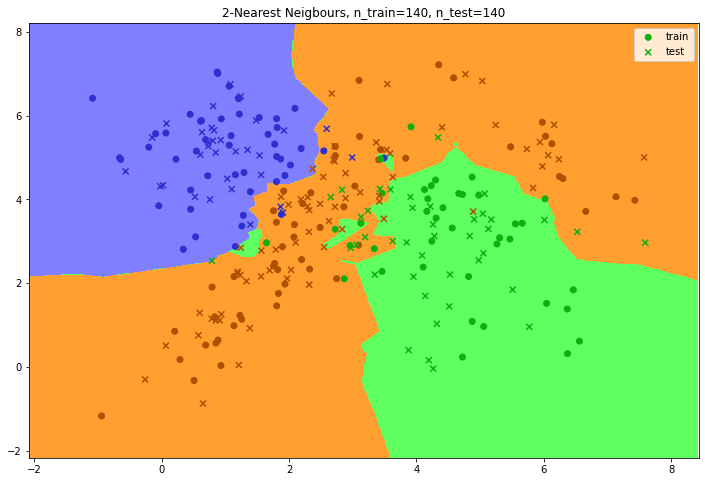

In [5]:
def plot_k_neighbors(k, data_train, data_test, classifier=KNeighborsClassifier):
    """
    k: Number of neighbors to use
    X_train: subsection of the dataset that is to be used for training
    X_test subsection of the dataset that is to be used for testing

    For more information on the KNeighborsClassifier see:
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    """
    inputs_train = data_train[:, 0:2]
    x_train = inputs_train[:, 0]
    y_train = inputs_train[:, 1]
    labels_train = data_train[:, 2]
    
    inputs_test = data_test[:, 0:2]
    x_test = inputs_test[:, 0]
    y_test = inputs_test[:, 1]
    labels_test = data_test[:, 2]
    
    # create model and fit data
    neigh = classifier(n_neighbors=k)
    out = neigh.fit(inputs_train, labels_train)
    preds_train = neigh.predict(inputs_train)
    
    # predict the labels of the test set and compute accuracy
    preds_test = neigh.predict(inputs_test)
    accuracy_test = metrics.accuracy_score(labels_test, preds_test)
    print(f"Classification error (%): {1 - accuracy_test:.3%}")
    
    # calculate boundaries for the plot
    border = 1
    x_min, x_max = x_train.min() - border, x_train.max() + border
    y_min, y_max = y_train.min() - border, y_train.max() + border
    
    # create meshgrid
    grid_size = .02
    xrange = np.arange(x_min, x_max, grid_size)  # (width)
    yrange = np.arange(y_min, y_max, grid_size)  # (height)
    xx, yy = np.meshgrid(xrange, yrange)  # both (height, width)
    
    # reshape meshgrid points for input to predictor
    # predict function expects shape (n_datapoints, features)
    # we are given two grids of shape (height, width) with one feature each
    # so we flatten and stack them to (height * width, features)
    xx_flat = xx.reshape(-1)
    yy_flat = yy.reshape(-1)
    grid_inputs = np.stack([xx_flat, yy_flat], axis=-1)
    
    # predict labels for each point in the grid
    # and reshape result to grid dimensions
    zz = neigh.predict(grid_inputs)  # (height * width)
    zz = zz.reshape(xx.shape)  # (height, width)
    
    # plot the contour
    plt.figure(figsize=(12,8))
    plt.contourf(xx, yy, zz, cmap=cmap_light)

    # plot the training data points
    plt.scatter(x_train, y_train, c=labels_train,
                cmap=cmap_bold, marker="o",
                label="train")
    
    # plot the test data points
    plt.scatter(x_test, y_test, c=labels_test,
                cmap=cmap_bold, marker="x",
                label="test")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(f"{k}-Nearest Neigbours, n_train={len(data_train)}, "
              f"n_test={len(data_test)}")
    plt.legend()
    
    plt.show()

plot_k_neighbors(2, data_train, data_test)


Classification error (%): 16.429%


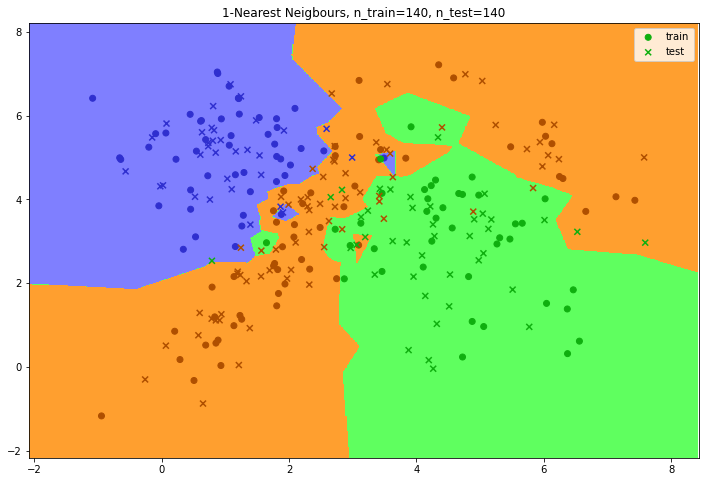

Classification error (%): 16.429%


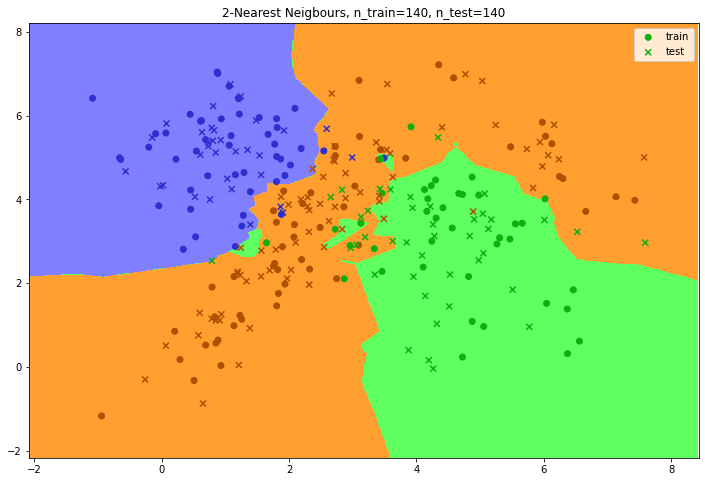

Classification error (%): 12.857%


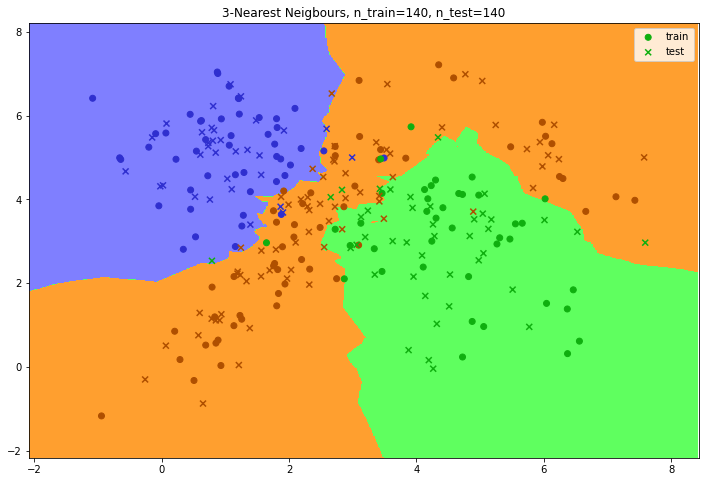

Classification error (%): 12.857%


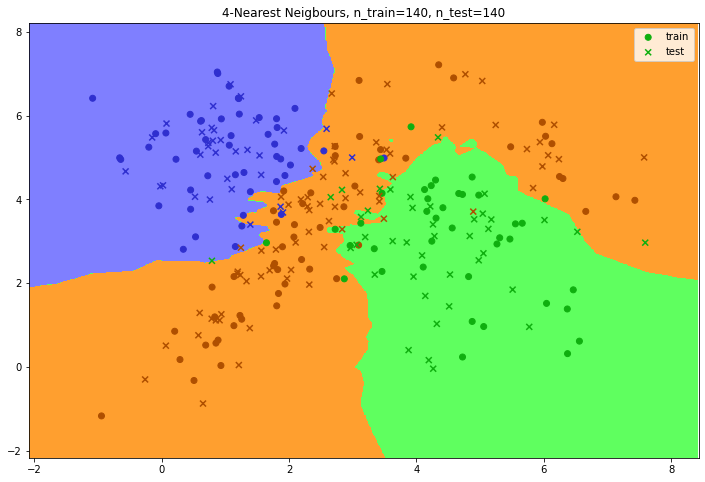

Classification error (%): 14.286%


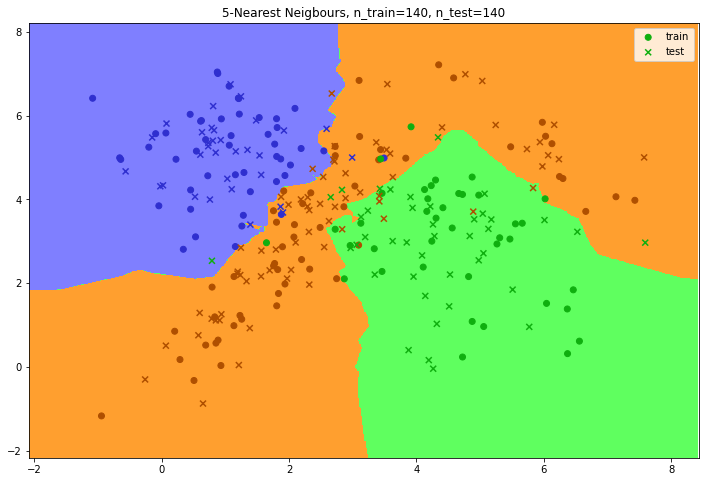

Classification error (%): 12.857%


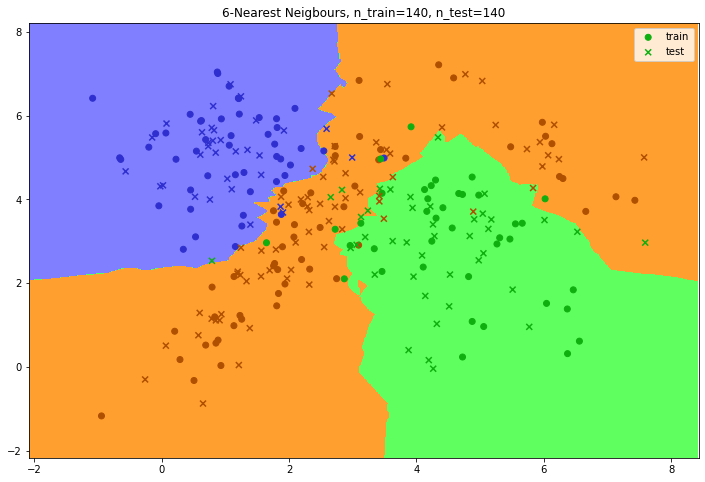

Classification error (%): 12.143%


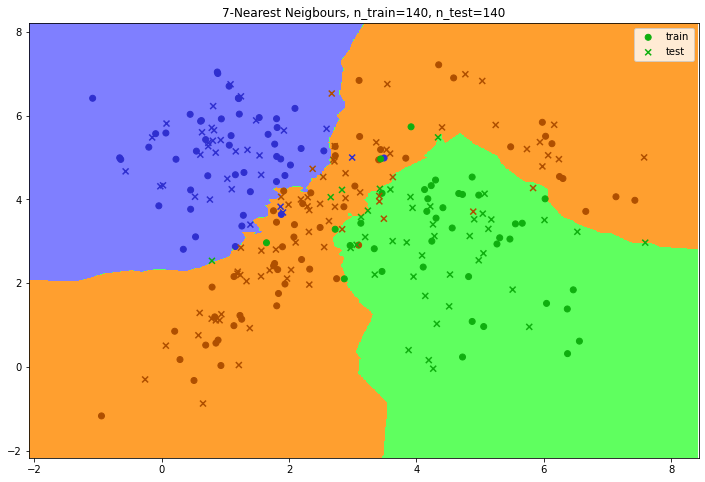

In [6]:
# test for different values of K
for k in range(1, 8):
    plot_k_neighbors(k, data_train, data_test)
    plt.show()

# $\star$ Question 2:
Do the same as above for different splits of the set into training and
test set. 

Is the classification error always the same? 

Compute the mean and the variance of the classification error over multiple splits. 

How are the mean and the variance affected by k? 

What you should observe is an effect illustrating the so-called bias-variance tradeoff and will be discussed in more detail in the next class.

Classification error (%): 12.946%


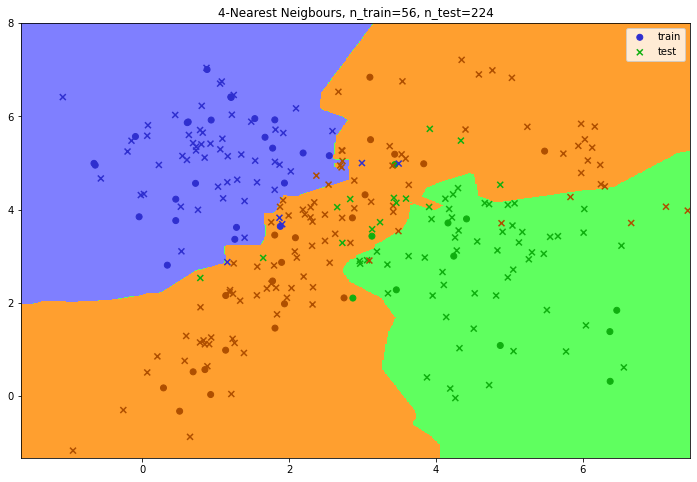

Classification error (%): 13.690%


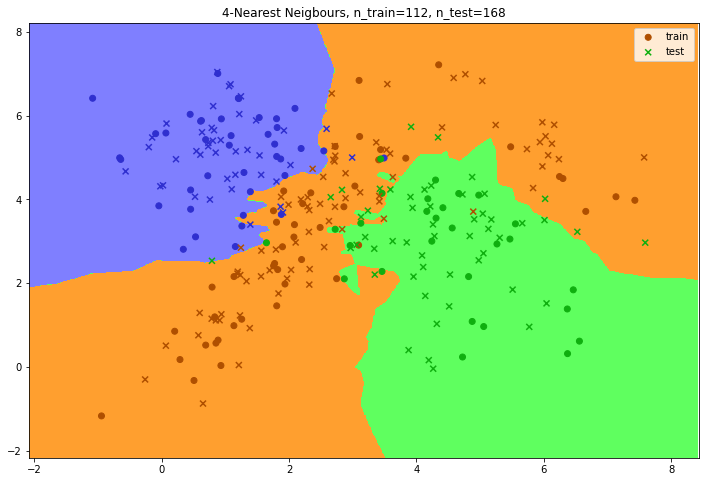

Classification error (%): 15.179%


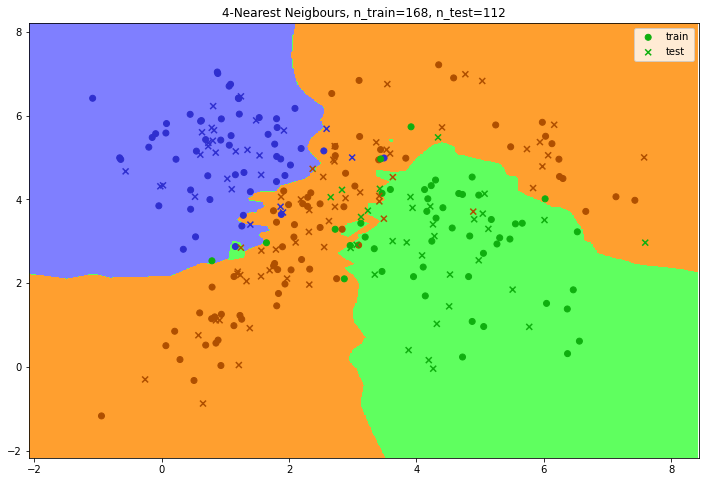

Classification error (%): 10.714%


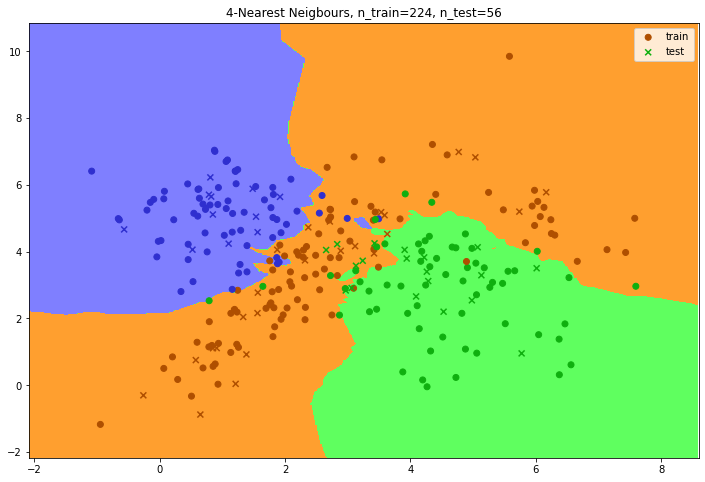

In [7]:
# here we fix K=4 and check how different test sizes change the result
k = 4
for test_size in [0.8, 0.6, 0.4, 0.2]:
    data_train, data_test = train_test_split(
        data, test_size=test_size, random_state=42)
    plot_k_neighbors(k, data_train, data_test)
    plt.show()

In [8]:
def get_errors(data, k, trials):
    errors = []
    for n in range(trials):
        data_train, data_test = train_test_split(
            data, test_size=0.5, random_state=42 + n)
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train[:, 0:2], data_train[:, 2])
        preds_test = neigh.predict(data_test[:, 0:2])
        errors.append(1 - metrics.accuracy_score(
            data_test[:, 2], preds_test))
    return errors

In [9]:
ks = range(1, 50)
trials = 100
errors = []
for k in ks:
    errors.append(get_errors(data, k, trials))
errors = np.array(errors)
errors.shape

(49, 100)

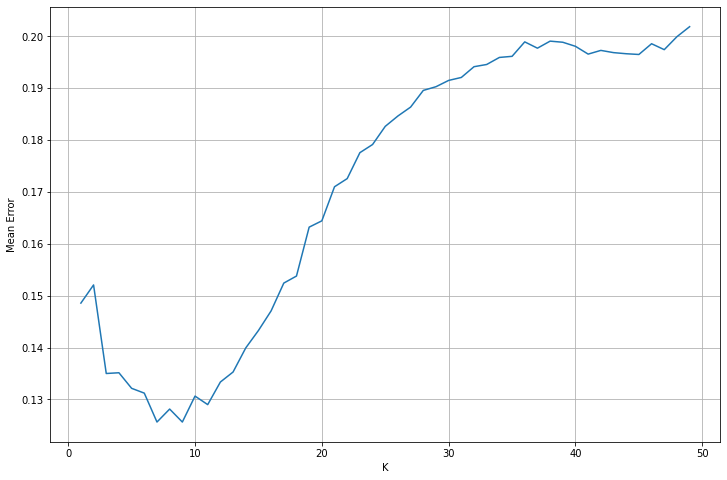

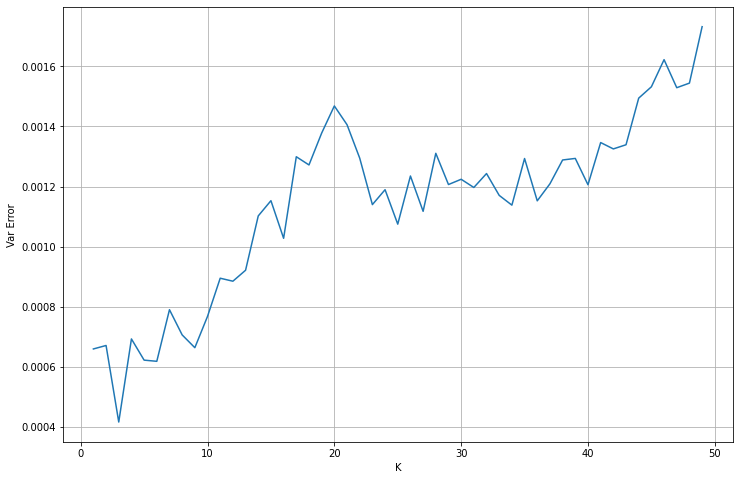

In [10]:
mean_error = np.mean(errors, axis=1)
var_error = np.var(errors, axis=1)

plt.figure(figsize=(12,8))
plt.plot(ks, mean_error)
plt.xlabel("K")
plt.ylabel("Mean Error")
plt.grid()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(ks, var_error)
plt.xlabel("K")
plt.ylabel("Var Error")
plt.grid()
plt.show()


## Bonus: Implement simple KNeighbour estimator

First, we implement a function to convert integer classes to [onehot vectors](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics).

In [11]:
def get_onehot_matrix(targets:np.ndarray, num_classes:int):
    # targets shape (n_datapoints)
    # we want a matrix of shape (n_datapoints, num_classes) s. t.
    # entry[n, cls] = 1 if targets[n] == cls else 0
    
    identity_matrix = np.eye(num_classes)  
    # shape (num_classes, num_classes)
    
    # for a datapoint n with class cls, select the row with number cls
    # to get the corresponding onehot vector
    # only integers can be used for indexing, so convert the labels
    res = identity_matrix[targets.astype(np.int64)]
    # shape (n_datapoints, num_classes)
    
    return res

example_targets = np.array([1.,3.,0.])
num_classes = 5
example_onehot = get_onehot_matrix(
    example_targets, num_classes)

print(f"Given targets {example_targets} and {num_classes} classes,"
      "\nresulting onehot matrix is:\n"
      f"{example_onehot}")

Given targets [1. 3. 0.] and 5 classes,
resulting onehot matrix is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


For each test datapoint $\mathbf{x}$ we find the $K$ nearest neighbors using Euclidean (squared) distance.

The Bayesian posterior probability of class $C_i$ is then given by:

$p(C_i | \mathbf{x}) = \dfrac{K_i}{K}$ where $K_i$ is the number of neighbors with class $C_i$.


In [12]:
class SimpleKNeighborsClassifier:
    def __init__(self, n_neighbors:int):
        self.k = n_neighbors

    def fit(self, data:np.ndarray, labels:np.ndarray):
        # simplest implementation just remembers all training data
        self.train_data = data
        assert len(self.train_data) >= k, (
            f"Need at least {k} training examples.")
        
        self.train_labels = labels 
        
        # also we want the classes to range from 0 to num_classes - 1
        # we use min and max to normalize and to determine the number of classes
        self.min_class = np.min(labels)
        self.train_labels = labels - self.min_class
        self.num_classes = int(np.max(self.train_labels) + 1)
                
        # now we can convert the labels to a onehot matrix
        self.train_labels_onehot = get_onehot_matrix(
            self.train_labels, self.num_classes)

    def predict(self, data:np.ndarray):
        # data shape (n_test_datapoints, d_features)
        # train data shape (n_train_datapoints, d_features)
        # train onehot labels shape (n_train_datapoints, n_classes)

        # get the squared distance between all train and test datapoints
        expanded_test_data = data[:, None, :]  # shape (n_test_datapoints, 1, d_features)
        expanded_train_data = self.train_data[None, :, :]  # shape (1, n_train_datapoints, d_features)
        squared_dists = (expanded_test_data - expanded_train_data) ** 2
        # shape (n_test_datapoints, n_train_datapoints, d_features)
        
        # average over last axis (-1)
        mean_dists = squared_dists.mean(axis=-1)
        # shape (n_test_datapoints, n_train_datapoints)
        
        # for each test datapoint,
        # sort the training datapoints by ascending distance
        sort_idx = np.argsort(mean_dists, axis=-1)

        # only keep the top k datapoints
        sort_idx = sort_idx[:, :self.k]
        # now we have for each test datapoint the index of the k closest
        # training datapoints.
        # shape (n_test_datapoints, k)
        
        # now we select the classes of those training datapoints
        # recall onehot labels shape: (n_train_datapoints, n_classes)
        neighbor_classes = self.train_labels_onehot[sort_idx]
        # shape (n_test_datapoint, k, n_classes)
        
        # since we have onehot vectors, we can average over the
        # neighbors to get the bayesian posterior
        probs = neighbor_classes.mean(axis=1)
        # shape (n_test_datapoints, n_classes)
        
        # finally we choose the class with the highest probability
        preds = probs.argmax(axis=-1)
        
        # now we undo the normalization
        preds = preds + self.min_class
        
        return preds


Classification error (%): 10.714%


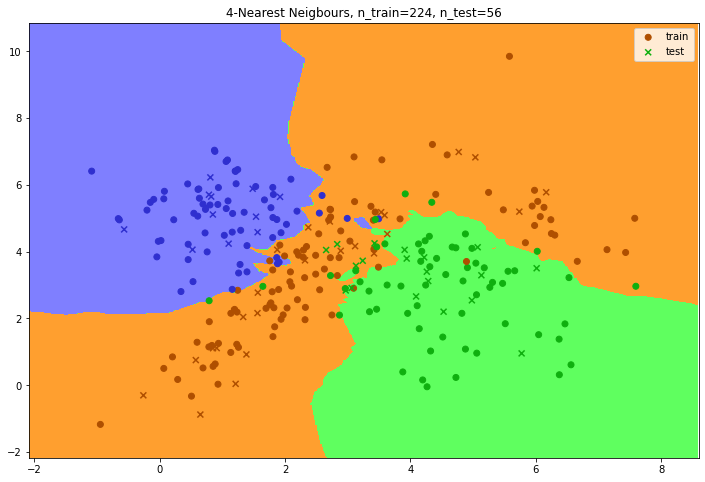

Classification error (%): 10.714%


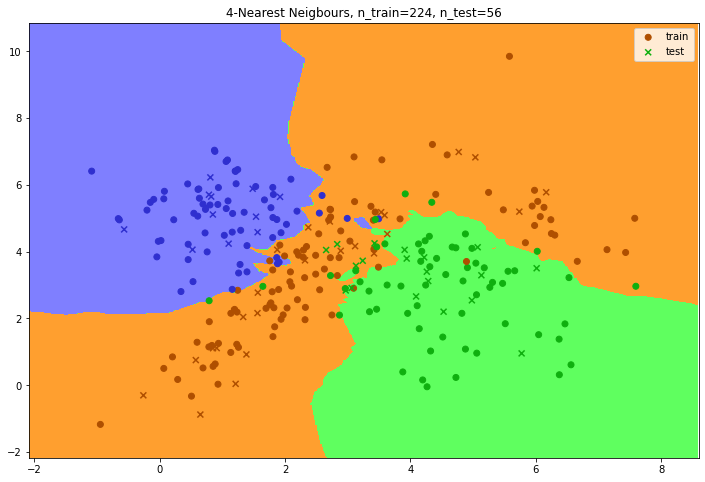

In [13]:
plot_k_neighbors(4, data_train, data_test, 
                 classifier=SimpleKNeighborsClassifier)
plot_k_neighbors(4, data_train, data_test, 
                 classifier=KNeighborsClassifier)

### Numpy excursion: Inplace modification

Be mindful of whether you are working with *copies* or *views* of your data.

Comparison of copying and inplace modification in numpy:

In [14]:
print(f"---------- Numpy ----------")
a = np.array([5])
b = a
b = b - 1
print(f"Copy:    {a} {b}")

a = np.array([5])
b = a
b -= 1
print(f"Inplace: {a} {b}")

print(f"---------- Python ----------")
a = 5
b = a
b = b - 1
print(f"Copy:    {a} {b}")

a = 5
b = a 
b -= 1
print(f"Inplace: {a} {b}")


---------- Numpy ----------
Copy:    [5] [4]
Inplace: [4] [4]
---------- Python ----------
Copy:    5 4
Inplace: 5 4
